# Kaggle Competition Example - Housing Price Prediction

This notebook is a simple example of a machine learning project for prediciting the cost of a house in Ames, Iowa for this [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
### IMPORTS ###

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

In [11]:
### FUNCTIONS ###

def divider():
    print("\n", "-"*50, "\n")

def clean_nulls(dataframe):
    df = dataframe.copy()
    for x in range(0, df.columns.size):
        column_name = df.columns[x]
        count = df[column_name].isnull().sum()
        percent = (count / len(df[column_name]) * 100)
        dtype = df[column_name].dtype
        if count > 0:
            if dtype == 'O':
                df[column_name].fillna('NA', inplace=True)
            elif dtype == 'float64':
                df[column_name].fillna(0, inplace=True)
    return df

def apply_all_transforms(dataframe):
    
    low_importance_features = ['2ndFlrSF',
        'MSSubClass',
        'BsmtUnfSF',
        'LotFrontage',
        'MoSold',
        'WoodDeckSF',
        'KitchenAbvGr',
        'Fireplaces',
        'TotRmsAbvGrd',
        'YrSold',
        'MasVnrArea',
        'BedroomAbvGr',
        'ScreenPorch',
        'EnclosedPorch',
        'BsmtFullBath',
        'HalfBath',
        'FullBath',
        'MiscVal',
        'BsmtFinSF2',
        'PoolArea',
        '3SsnPorch',
        'BsmtHalfBath',
        'LowQualFinSF'
    ]
    
    def encode_pr(x): return 1 if x == 'Partial' else 0
    def encode_ta(x): return 1 if x == 'TA' else 0
    def encode_gd(x): return 1 if x == 'Gd' else 0
    
    df = dataframe.copy()
    df = clean_nulls(df) # Setting null values to NA for categorical and 0 for numeric
    
    # Perform encoding for categorical features
    #df['enc_street']    = pd.get_dummies(df.Street, drop_first=True)
    #df['enc_ext_ta']    = df.ExterQual.apply(encode_ta)
    #df['enc_ext_gd']    = df.ExterQual.apply(encode_gd)
    #df['enc_ext_ta']    = df.ExterQual.apply(encode_ta)
    #df['enc_ext_gd']    = df.ExterQual.apply(encode_gd)
    #df['enc_bsmt_ta']   = df.BsmtQual.apply(encode_ta)
    #df['enc_bsmt_gd']   = df.BsmtQual.apply(encode_gd)
    #df['enc_extc_ta']   = df.ExterCond.apply(encode_ta)
    #df['enc_extc_gd']   = df.ExterCond.apply(encode_gd)
    #df['enc_bsmtc_ta']  = df.BsmtCond.apply(encode_ta)
    #df['enc_bsmtc_gd']  = df.BsmtCond.apply(encode_gd)
    #df['enc_condition'] = df.SaleCondition.apply(encode_pr)
    
    # Drop features of low importance
    df = df.drop(low_importance_features, axis=1)
    
    # Remove any features that are not numeric
    df = df.select_dtypes(include=[np.number])
    
    return df

def evaluate(model, name):
    predictions = model.predict(X_test)
    
    print("EVALUATING MODEL :", name)
    print("R^2  :", model.score(X_test, y_test))
    print("RMSE :", mean_squared_error(y_test, predictions))

    actual_values = y_test
    plt.scatter(predictions, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Linear Regression Model')
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(model.score(X_test, y_test), mean_squared_error(y_test, predictions))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    
def cross_validate(model, X, y, name):
    print("CROSS-VALIDATING MODEL :", name)
    
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("RMSE SCORES :", rmse_scores)
    print("MEAN        :", rmse_scores.mean())
    print("STD DEV     :", rmse_scores.std())

In [12]:
### ACQUIRE DATA ###

test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [13]:
### TRANSFORM ###

train_mod = apply_all_transforms(train)
test_mod = apply_all_transforms(test)

In [14]:
### MODEL ###

y = np.log(train_mod.SalePrice)
X = train_mod.drop(['SalePrice', 'Id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

tree_reg = DecisionTreeRegressor()
dt_model = tree_reg.fit(X_train, y_train)

forest_reg = RandomForestRegressor()
rf_model = forest_reg.fit(X_train, y_train)


 -------------------------------------------------- 

EVALUATING MODEL : Linear Regression
R^2  : 0.868874077467
RMSE : 0.0223479723658


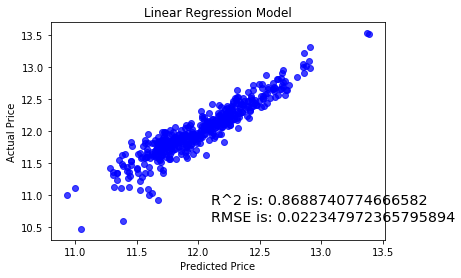

CROSS-VALIDATING MODEL : Linear Regression
RMSE SCORES : [ 0.13977536  0.20857288  0.15567317  0.31318025  0.18441191  0.151842
  0.1309838   0.12665108  0.14595701  0.11749406]
MEAN        : 0.167454153053
STD DEV     : 0.0550601237267

 -------------------------------------------------- 

EVALUATING MODEL : Decision Tree Regressor
R^2  : 0.736047525713
RMSE : 0.044985785322


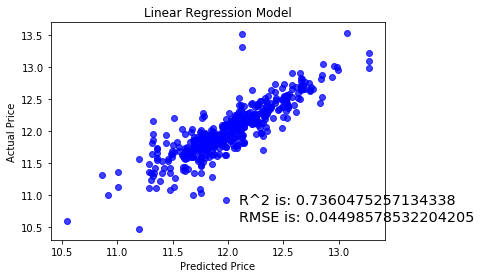

CROSS-VALIDATING MODEL : Decision Tree Regressor
RMSE SCORES : [ 0.21015981  0.26902261  0.23430899  0.22806431  0.25279798  0.19422375
  0.1780512   0.20219977  0.23972582  0.17451894]
MEAN        : 0.218307319166
STD DEV     : 0.0300257915223

 -------------------------------------------------- 

EVALUATING MODEL : Random Forest Regressor
R^2  : 0.858196420207
RMSE : 0.0241677802631


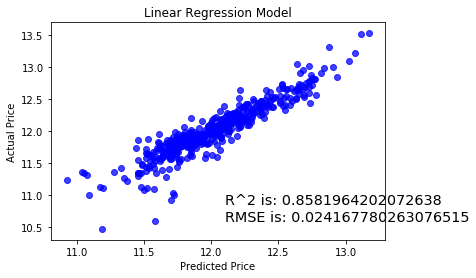

CROSS-VALIDATING MODEL : Random Forest Regressor
RMSE SCORES : [ 0.13165329  0.16808409  0.17489216  0.16999212  0.18751268  0.15742762
  0.14726889  0.13231145  0.15300869  0.10905082]
MEAN        : 0.153120181156
STD DEV     : 0.0224815198623


In [15]:
### EVALUATE ###

divider()
evaluate(lr_model, "Linear Regression")
cross_validate(LinearRegression(), X_train, y_train, "Linear Regression")

divider()
evaluate(dt_model, "Decision Tree Regressor")
cross_validate(DecisionTreeRegressor(), X_train, y_train, "Decision Tree Regressor")

divider()
evaluate(rf_model, "Random Forest Regressor")
cross_validate(RandomForestRegressor(), X_train, y_train, "Random Forest Regressor")

In [16]:
feature_importances = rf_model.feature_importances_
num_attribs = list(train.select_dtypes(include=[np.number]).columns)[1:37]
extra_attribs = ["enc_street", "enc_ext_ta"]
attributes = list(X_train.select_dtypes(include=[np.number]).columns)
sorted(zip(feature_importances, attributes), reverse=True)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'OpenPorchSF']


[(0.57721509615503241, 'OverallQual'),
 (0.099002296271652135, 'GrLivArea'),
 (0.057486852032978132, 'GarageArea'),
 (0.049692028968123296, 'TotalBsmtSF'),
 (0.039873992746944711, 'BsmtFinSF1'),
 (0.034409020669819178, '1stFlrSF'),
 (0.034249837082922036, 'LotArea'),
 (0.03243491061114763, 'GarageCars'),
 (0.017418973444701231, 'YearBuilt'),
 (0.017247418088105454, 'YearRemodAdd'),
 (0.014652184894133471, 'OpenPorchSF'),
 (0.013335034041716164, 'GarageYrBlt'),
 (0.012982354992724201, 'OverallCond')]

In [17]:
### SELECT MODEL ###

# Linear Regression
model = lr_model

# Decision Tree Regressor
# model = dt_model

# Random Forest Regressor 
# model = rf_model

In [18]:
### PREPARE SUBMISSION ###

submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test_mod.select_dtypes(include=[np.number]).drop(['Id'], axis=1)

predictions = model.predict(feats)
final_predictions = np.exp(predictions)

submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,115155.151250
1,1462,149115.085826
2,1463,170066.573457
3,1464,191028.580809
4,1465,199914.612846


In [19]:
### GENERATE SUBMISSION AND SAVE MODELS ###

submission.to_csv('submission.csv', index=False)
joblib.dump(lr_model, "lr_model.pkl")
joblib.dump(dt_model, "dt_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']